<a href="https://colab.research.google.com/github/baliant/Thesis/blob/main/NagyBalint_Thesis_2_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Description

## Merging raw files

# Tools, functions

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import cartopy.feature as cfeature

# Interactive
import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

In [ ]:
# Plot data
def plot_data(dataset, desired_date, variable_name, title, vmin=None, vmax=None):
    """
    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data with time, latitude, and longitude dimensions.
    - desired_date: str
        The date to filter and plot data for (format: 'YYYY-MM-DD').
    - variable_name: str
        The name of the variable to plot (e.g., 'tg').
    - title: str
        The title of the plot.
    """
    # Select the data for the desired date
    data_for_desired_date = dataset.sel(time=desired_date)

    # Filter the dataset to include only data between -30 and 40 degrees longitude
    filtered_data = data_for_desired_date.where(
        (data_for_desired_date.longitude >= -30) & (data_for_desired_date.longitude <= 40),
        drop=True
    )

    # Plot the  data
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Set ticks and labels
    ax.set_xticks(range(-30, 50, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(range(20, 80, 10), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude [degrees_east]')
    ax.set_ylabel('Latitude [degrees_north]')

    # Plot the selected variable from the filtered data
    filtered_data[variable_name].plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="plasma",
        vmin=vmin,
        vmax=vmax
    )

    # Set the title
    plt.title(title)
    plt.show()

In [ ]:
plot_data(
    dataset=xr.open_dataset('cams.eaq.vra.ENSa.pm2p5.l0.2021-01.nc'),
    desired_date='2001-01-15',
    variable_name='pm2p5',
    title="Surface temperature for 2008-06-29",
    vmin=-20,
    vmax=40
)

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [ ]:
print(xr.open_dataset('cams.eaq.vra.ENSa.pm2p5.l0.2021-01.nc'))

<xarray.Dataset> Size: 875MB
Dimensions:  (time: 744, lon: 700, lat: 420)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2021-01-01 ... 2021-01-31T23:00:00
  * lon      (lon) float64 6kB -24.95 -24.85 -24.75 -24.65 ... 44.75 44.85 44.95
  * lat      (lat) float64 3kB 30.05 30.15 30.25 30.35 ... 71.75 71.85 71.95
Data variables:
    pm2p5    (time, lat, lon) float32 875MB ...
Attributes:
    Conventions:  CF-1.7
    Title:        CAMS European air quality validated reanalysis
    Provider:     COPERNICUS European air quality service
    Production:   COPERNICUS Atmosphere Monitoring Service


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a Date Picker widget
date_picker = widgets.DatePicker(
    description='Select Date',
    disabled=False
)

# Function to handle date selection
def on_date_change(change):
    if change['new']:
        # Clear the previous output
        clear_output(wait=True)

        display(date_picker)

        desired_date = change['new'].strftime('%Y-%m-%d')
        variable_name = 'tg'
        title = f"Surface temperature for {desired_date}"


        print(f"Updating plot for date: {desired_date}")
        plot_data(mean_temp_1995, desired_date, variable_name, title)


date_picker.observe(on_date_change, names='value')

display(date_picker)

In [ ]:
# Gif Generation
def create_gif_from_dataset(dataset, variable_name, output_folder, gif_name, start_day, end_day, vmin, vmax):
    """
    Creates a GIF from the dataset by plotting each day's data.

    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data.
    - variable_name: str
        The name of the variable to plot.
    - output_folder: str
        The folder where the frames and GIF will be saved.
    - gif_name: str
        The name of the output GIF.
    - start_day, end_day: int
        The range of days to include in the GIF.
    - vmin: int
        Scale minimum
    - vmax: int
        Scale maximum
    """
    os.makedirs(output_folder, exist_ok=True)
    time_values = dataset.time.values[start_day - 1:end_day]

    # Generate frames
    image_frames = []
    for i, date in enumerate(time_values, start=start_day):
        date_str = str(date)[:10]  # Extract the date string
        output_path = f"{output_folder}/{i}.jpg"

        # Call plot data function for the specific day
        plot_data(
            dataset,
            desired_date=date,
            variable_name=variable_name,
            title=f"{variable_name.capitalize()} for {date_str}",
            output_path=output_path,
            vmin=vmin,
            vmax=vmax
        )

        # Add frame to GIF
        new_frame = PIL.Image.open(output_path)
        image_frames.append(new_frame)

    # Save as GIF
    gif_path = f"{output_folder}/{gif_name}.gif"
    image_frames[0].save(
        gif_path,
        format="GIF",
        append_images=image_frames[1:],
        save_all=True,
        duration=100,
        loop=0,
    )

    print(f"GIF saved at {gif_path}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import PIL
import os

def plot_data(dataset, desired_date, variable_name, title, output_path, vmin=None, vmax=None):
    """
    Plots the data for a specific date and saves the plot as an image.

    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data with time, latitude, and longitude dimensions.
    - desired_date: str
        The date to filter and plot data for (format: 'YYYY-MM-DD').
    - variable_name: str
        The name of the variable to plot (e.g., 'tg').
    - title: str
        The title of the plot.
    - output_path: str
        The file path where the plot will be saved.
    - vmin, vmax: float, optional
        Minimum and maximum values for the colormap.
    """
    # Select the data for the desired date
    data_for_desired_date = dataset.sel(time=desired_date)

    # Filter the dataset to include only data between -30 and 40 degrees longitude
    filtered_data = data_for_desired_date.where(
        (data_for_desired_date.longitude >= -30) & (data_for_desired_date.longitude <= 40),
        drop=True
    )

    # Plot the data
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Set ticks and labels
    ax.set_xticks(range(-30, 50, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(range(20, 80, 10), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude [degrees_east]')
    ax.set_ylabel('Latitude [degrees_north]')

    # Plot the selected variable from the filtered data
    filtered_data[variable_name].plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap="plasma",
        vmin=vmin,
        vmax=vmax
    )

    # Set the title
    plt.title(title)

    # Save the figure
    plt.savefig(output_path)
    plt.close()

def create_gif_from_dataset(dataset, variable_name, output_folder, gif_name, start_day, end_day, vmin, vmax):
    """
    Creates a GIF from the dataset by plotting each day's data.

    Parameters:
    - dataset: xarray Dataset
        The dataset containing the data.
    - variable_name: str
        The name of the variable to plot.
    - output_folder: str
        The folder where the frames and GIF will be saved.
    - gif_name: str
        The name of the output GIF.
    - start_day, end_day: int
        The range of days to include in the GIF.
    """
    os.makedirs(output_folder, exist_ok=True)
    time_values = dataset.time.values[start_day - 1:end_day]

    # Generate frames
    image_frames = []
    for i, date in enumerate(time_values, start=start_day):
        date_str = str(date)[:10]  # Extract the date string
        output_path = f"{output_folder}/{i}.jpg"

        # Plot data for the specific day
        plot_data(
            dataset,
            desired_date=date,
            variable_name=variable_name,
            title=f"{variable_name.capitalize()} for {date_str}",
            output_path=output_path,
            vmin=vmin,
            vmax=vmax
        )

        # Add frame to GIF
        new_frame = PIL.Image.open(output_path)
        image_frames.append(new_frame)

    # Save as GIF
    gif_path = f"{output_folder}/{gif_name}.gif"
    image_frames[0].save(
        gif_path,
        format="GIF",
        append_images=image_frames[1:],
        save_all=True,
        duration=100,
        loop=0,
    )

    print(f"GIF saved at {gif_path}")


In [ ]:
# Parameters
dataset = xr.open_dataset('DailyHumidity_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc')
output_folder = "./output"
variable_name = "hu"
gif_name = f"{variable_name}_timelapse"
start_day = 1
end_day = 100
vmin=0
vmax=10

# Generate GIF
create_gif_from_dataset(dataset, variable_name, output_folder, gif_name, start_day, end_day, vmin, vmax)


GIF saved at ./output/hu_timelapse.gif


In [ ]:
import shutil

shutil.rmtree('output')

In [ ]:
# Merging netCDF files
import xarray as xr
import os

ds = xr.open_mfdataset('*.nc',combine = 'by_coords')
ds.to_netcdf('MaxTemperature_1995_2024.nc')

directory_path = "/content"

# Iterate over files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory_path, filename)
        print(f"Opening dataset: {filename}")

        # Open the dataset
        dataset = xr.open_dataset(file_path)

        # Print the dataset
        print(dataset)
        print("\n" + "-"*40 + "\n")

Opening dataset: MaxTemperature_1995_2024.nc
<xarray.Dataset> Size: 4GB
Dimensions:    (time: 10774, latitude: 201, longitude: 464)
Coordinates:
  * time       (time) datetime64[ns] 86kB 1995-01-01 1995-01-02 ... 2024-06-30
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
Data variables:
    tx         (time, latitude, longitude) float32 4GB ...
Attributes:
    E-OBS_version:  30.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Aug 30 12:47:15 2024: ncks --no-abc -d time,16436,222...
    NCO:            netCDF Operators version 5.1.8 (Homepage = http://nco.sf....

----------------------------------------

Opening dataset: DailyMaxTemp_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc
<xarray.Dataset> Size: 2GB
Dimensions:    (latitude: 201, longitude: 464, time: 5844)
Coordinates:
  * latitude   (latitude) 

In [ ]:
print(xr.open_dataset('DailyHumidity_ens_mean_0.25deg_reg_1995-2010_v30.0e.nc'))
print(xr.open_dataset('DailyHumidity_ens_mean_0.25deg_reg_2011-2024_v30.0e.nc'))

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 5844, latitude: 201, longitude: 464)
Coordinates:
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * time       (time) datetime64[ns] 47kB 1995-01-01 1995-01-02 ... 2010-12-31
Data variables:
    hu         (time, latitude, longitude) float32 2GB ...
Attributes:
    E-OBS_version:  30.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Mon Sep  9 11:16:07 2024: ncks --no-abc -d time,16436,222...
    NCO:            netCDF Operators version 5.1.8 (Homepage = http://nco.sf....
<xarray.Dataset> Size: 2GB
Dimensions:    (time: 4930, latitude: 201, longitude: 464)
Coordinates:
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * time       (time) datetime64

In [ ]:
print(xr.open_dataset('Humidity_1995_2024.nc'))

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 10774, latitude: 201, longitude: 464)
Coordinates:
  * time       (time) datetime64[ns] 86kB 1995-01-01 1995-01-02 ... 2024-06-30
  * longitude  (longitude) float64 4kB -40.38 -40.12 -39.88 ... 75.12 75.38
  * latitude   (latitude) float64 2kB 25.38 25.62 25.88 ... 74.88 75.12 75.38
Data variables:
    hu         (time, latitude, longitude) float32 4GB ...
Attributes:
    E-OBS_version:  30.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Mon Sep  9 11:16:07 2024: ncks --no-abc -d time,16436,222...
    NCO:            netCDF Operators version 5.1.8 (Homepage = http://nco.sf....


### Dataset for analysis

Note: Europe dataset can be used for analysis as well.

In [ ]:
# Coordinates of Budapest
latitude = 47.49801
longitude = 19.03991

# Due to API limitations I had to give broader area (with a too close area it handled as an exception and downloaded whole Europe)
north = 50.1
west = 15.1
south = 45.5
east = 22.2

In [ ]:
# 1995 - 2010
c = cdsapi.Client()
print([north, west, south, east])

c.retrieve(
    'insitu-gridded-observations-europe',
    {
        'product_type': 'ensemble_mean',
        'variable': 'mean_temperature',
        'grid_resolution': '0.1deg',
        'period': '1995_2010',
        'area': [north, west, south, east],
        'version': '28.0e',
        'format': 'zip',
    },
    'download_1995_2010.zip')

Exception: Missing/incomplete configuration file: /root/.cdsapirc

In [ ]:
# 2011 - 2023
c = cdsapi.Client()

c.retrieve(
    'insitu-gridded-observations-europe',
    {
        'product_type': 'ensemble_mean',
        'variable': 'mean_temperature',
        'grid_resolution': '0.1deg',
        'period': '2011_2023',
        'area': [north, west, south, east],
        'version': '28.0e',
        'format': 'zip',
    },
    'download_2011_2023.zip')

In [ ]:
extract('download_1995_2010.zip')
extract('download_2011_2023.zip')

In [ ]:
import xarray as xr

In [ ]:
netcdf_file = '1995_2010.nc'
xrds_1995 = xr.open_dataset(netcdf_file)
print(xrds_1995)

In [ ]:
print(xrds_1995['time'].values)

In [ ]:
netcdf_file = '2011_2023.nc'
xrds_2011 = xr.open_dataset(netcdf_file)
print(xrds_2011)

In [ ]:
# Check data structure
for attribute, value in xrds_1995.attrs.items():
  print(attribute, value, '\n')

In [ ]:
print(xrds_1995.data_vars['tg'])
print(xrds_2011.data_vars['tg'])

In [ ]:
desired_date = '2009-06-29'
data_for_desired_date = xrds_1995.sel(time=desired_date)

In [ ]:
print(data_for_desired_date)

In [ ]:
plt.figure(figsize=(10,5))

data_for_desired_date['tg'].plot()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.set_xticks(range(-30,50,10), crs=ccrs.PlateCarree())
ax.set_yticks(range(20,80,10), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


data_for_desired_date['tg'].plot()

plt.title(f'Surface temperature for {desired_date}')
plt.show()

# Synthetic Time Series

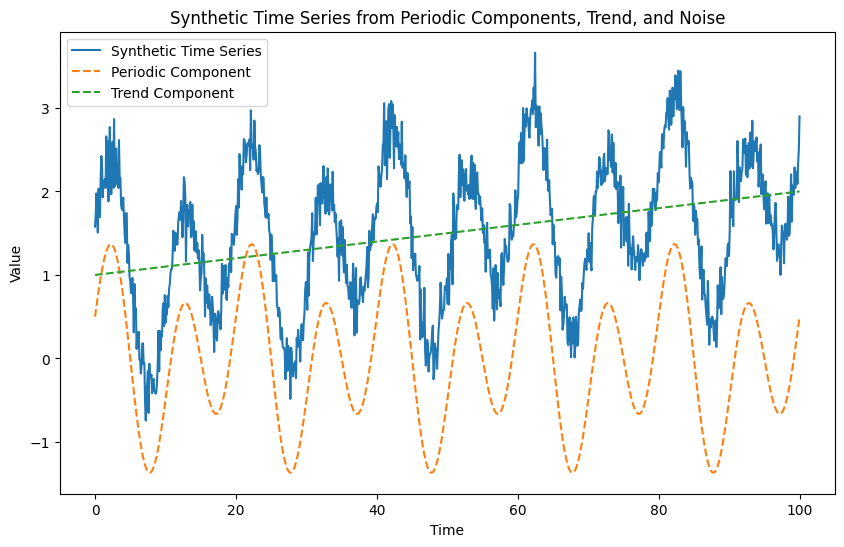

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for time series
t = np.linspace(0, 100, 1000)  # Time points
A1, A2 = 1.0, 0.5              # Amplitudes for periodic components
f1, f2 = 0.1, 0.05             # Frequencies for periodic components
a, b = 0.01, 1                 # Parameters for trend - linear
noise_std = 0.2                # Standard deviation of noise

# Generate periodic components
periodic_component = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t)

# Generate trend component
trend_component = a * t + b

# Generate noise component
noise_component = np.random.normal(0, noise_std, len(t))

# Combine
synthetic_time_series = periodic_component + trend_component + noise_component

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, synthetic_time_series, label='Synthetic Time Series')
plt.plot(t, periodic_component, label='Periodic Component', linestyle='--')
plt.plot(t, trend_component, label='Trend Component', linestyle='--')
plt.title('Synthetic Time Series from Periodic Components, Trend, and Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Dataframe

## Create DataFrame

For a single time series, there is no added value to use nc files, so first I convert them to a more usual dataframes.

In [ ]:
ds = xr.open_dataset('1995_2010.nc')

time_target = dt.datetime(2009, 6, 29)
# Coordinates of Budapest
lat_target = 47.497913
lon_target = 19.040236

timeslice = ds.sel(time=time_target, method='nearest')
lat_lon_slice = ds.sel(latitude=latitude, longitude=longitude, method='nearest')

df_1995 = lat_lon_slice.to_dataframe()
print(df_1995)

             latitude  longitude    tg
time                                  
1995-01-01  47.449861   19.04986  2.83
1995-01-02  47.449861   19.04986  2.31
1995-01-03  47.449861   19.04986  0.84
1995-01-04  47.449861   19.04986 -0.69
1995-01-05  47.449861   19.04986  0.18
...               ...        ...   ...
2010-12-27  47.449861   19.04986 -4.93
2010-12-28  47.449861   19.04986 -5.05
2010-12-29  47.449861   19.04986 -6.71
2010-12-30  47.449861   19.04986 -7.60
2010-12-31  47.449861   19.04986 -5.87

[5844 rows x 3 columns]


In [ ]:
ds = xr.open_dataset('2011_2023.nc')

time_target = dt.datetime(2022, 6, 29)

timeslice = ds.sel(time=time_target, method='nearest')
lat_lon_slice = ds.sel(latitude=latitude, longitude=longitude, method='nearest')

df_2011 = lat_lon_slice.to_dataframe()
print(df_2011)

             latitude  longitude         tg
time                                       
2011-01-01  47.449861   19.04986  -1.840000
2011-01-02  47.449861   19.04986   0.480000
2011-01-03  47.449861   19.04986  -2.380000
2011-01-04  47.449861   19.04986  -3.800000
2011-01-05  47.449861   19.04986  -3.580000
...               ...        ...        ...
2023-06-26  47.449861   19.04986  22.309999
2023-06-27  47.449861   19.04986  21.180000
2023-06-28  47.449861   19.04986  18.609999
2023-06-29  47.449861   19.04986  19.650000
2023-06-30  47.449861   19.04986  21.539999

[4564 rows x 3 columns]


In [ ]:
# # ignore index False, I want to keep the time index
# df = pd.concat([df_1995, df_2011], ignore_index=False)

In [ ]:
print(df)

             latitude  longitude         tg
time                                       
1995-01-01  47.449861   19.04986   2.830000
1995-01-02  47.449861   19.04986   2.310000
1995-01-03  47.449861   19.04986   0.840000
1995-01-04  47.449861   19.04986  -0.690000
1995-01-05  47.449861   19.04986   0.180000
...               ...        ...        ...
2023-06-26  47.449861   19.04986  22.309999
2023-06-27  47.449861   19.04986  21.180000
2023-06-28  47.449861   19.04986  18.609999
2023-06-29  47.449861   19.04986  19.650000
2023-06-30  47.449861   19.04986  21.539999

[10408 rows x 3 columns]


## Dataframe description

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss

from pmdarima.arima import ADFTest, KPSSTest, ndiffs, auto_arima

from scipy.stats import skew, kurtosis, kstest



In [ ]:
df = pd.read_csv('data/Budapest_1995_2023.csv')
df['time'] = pd.to_datetime(df['time'])

df.head()

time    tg
0 1995-01-01  2.83
1 1995-01-02  2.31
2 1995-01-03  0.84
3 1995-01-04 -0.69
4 1995-01-05  0.18

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10408 entries, 0 to 10407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    10408 non-null  datetime64[ns]
 1   tg      10408 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 162.8 KB
None


In [ ]:
df.describe()

time            tg
count                10408  10408.000000
mean   2009-03-31 12:00:00     12.446031
min    1995-01-01 00:00:00    -11.300000
25%    2002-02-14 18:00:00      5.347500
50%    2009-03-31 12:00:00     12.840000
75%    2016-05-15 06:00:00     19.622499
max    2023-06-30 00:00:00     33.030000
std                    NaN      8.697220

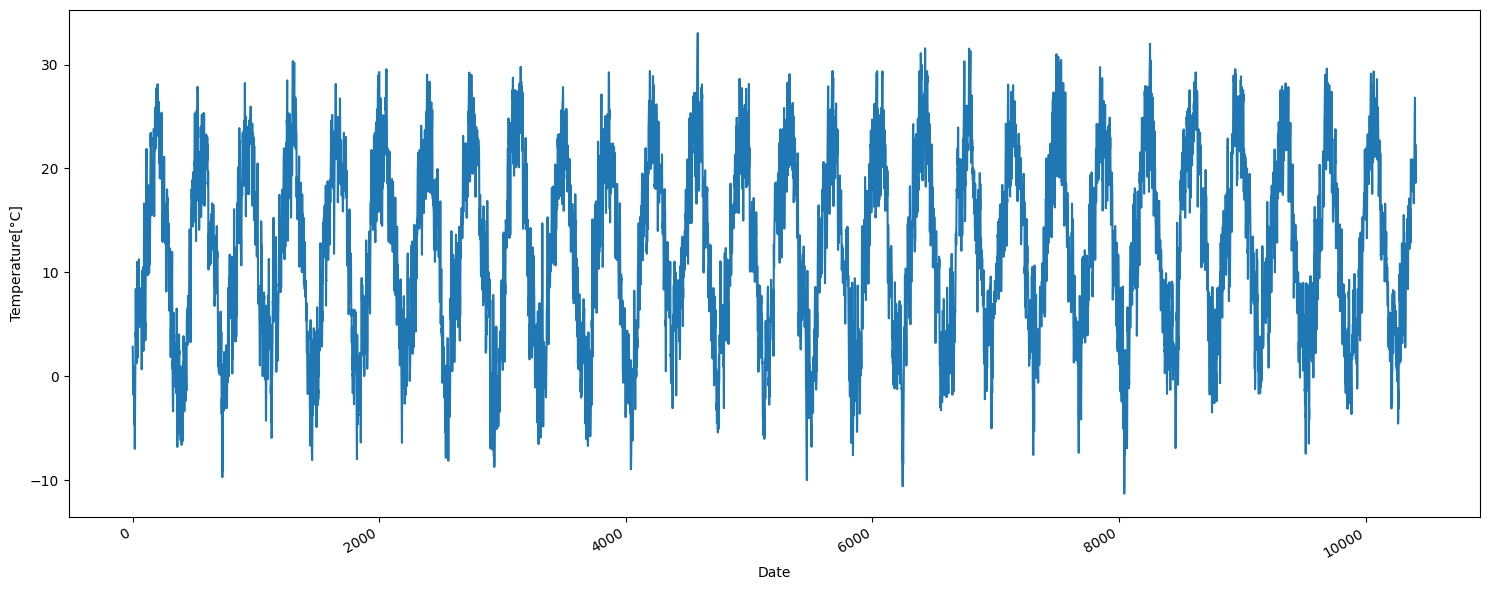

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df['tg'])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature[°C]')


fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
df.describe()

time            tg
count                10408  10408.000000
mean   2009-03-31 12:00:00     12.446031
min    1995-01-01 00:00:00    -11.300000
25%    2002-02-14 18:00:00      5.347500
50%    2009-03-31 12:00:00     12.840000
75%    2016-05-15 06:00:00     19.622499
max    2023-06-30 00:00:00     33.030000
std                    NaN      8.697220

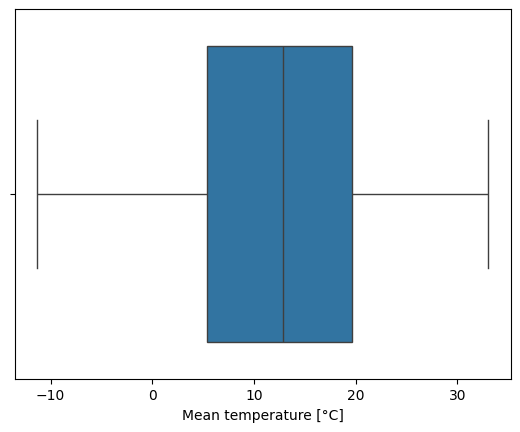

In [ ]:
sns.boxplot(x=df['tg']).set(
    xlabel='Mean temperature [°C]',
)
plt.show()

In [ ]:
df['time'] = pd.to_datetime(df['time'])

ad_fuller_result = adfuller(df['tg'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.2310736554959
p-value: 4.9518918029253205e-08


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['tg'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.231074
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df['tg'])

Results of KPSS Test:
Test Statistic            0.089257
p-value                   0.100000
Lags Used                58.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-20-01caf3c26e42>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


Normality

In [ ]:
from scipy import stats

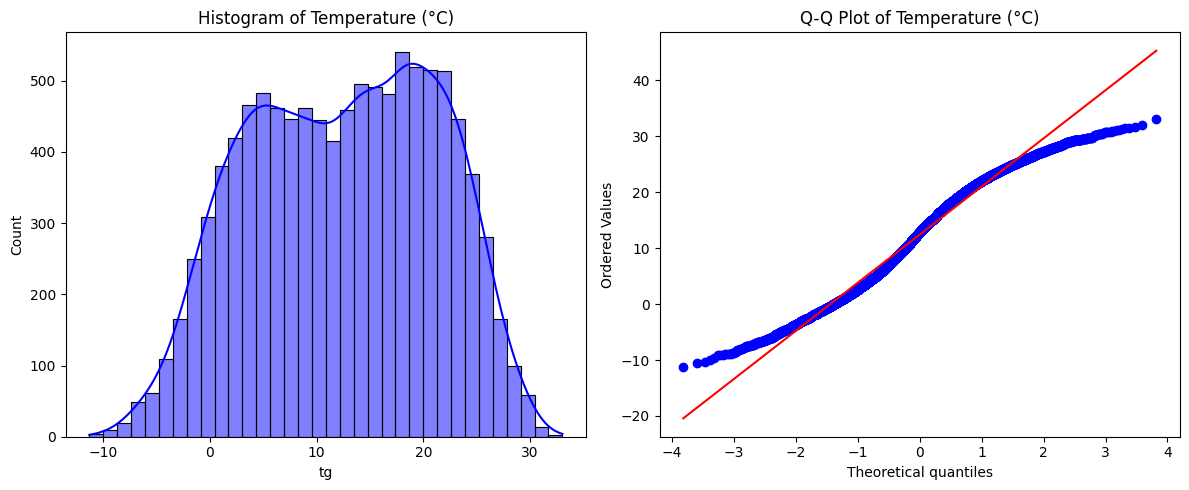

In [ ]:
data_columns = {
    'tg': ('Temperature (°C)', 'blue')
}

# Creating plots
fig, axes = plt.subplots(len(data_columns), 2, figsize=(12, 5 * len(data_columns)))

# Adjusting axes indexing for a single plot
if len(data_columns) == 1:
    axes = [axes]

for i, (col, (title, color)) in enumerate(data_columns.items()):
    # Histogram
    sns.histplot(df[col], kde=True, color=color, ax=axes[i][0])
    axes[i][0].set_title(f'Histogram of {title}')

    # Q-Q plot
    stats.probplot(df[col], dist="norm", plot=axes[i][1])
    axes[i][1].set_title(f'Q-Q Plot of {title}')

plt.tight_layout()
plt.show()

In [ ]:
normality_results = {}

for col in data_columns.keys():
    shapiro_stat, shapiro_p = stats.shapiro(df[col].sample(5000))
    anderson_result = stats.anderson(df[col], dist='norm')

    normality_results[col] = {
        'Shapiro-Wilk Test': {'Statistic': shapiro_stat, 'p-value': shapiro_p}
    }

def evaluate_normality_tests(normality_results):
    for variable, tests in normality_results.items():
        print(f"Results for {variable}:")

        # Shapiro-Wilk Test
        shapiro_p = tests['Shapiro-Wilk Test']['p-value']
        print(f"  Shapiro-Wilk Test p-value: {shapiro_p:.2e}")
        if shapiro_p < 0.05:
            print("  The data does NOT follow a normal distribution (Shapiro-Wilk Test).")
        else:
            print("  The data follows a normal distribution (Shapiro-Wilk Test).")
        print()

evaluate_normality_tests(normality_results)

Results for tg:
  Shapiro-Wilk Test p-value: 8.52e-27
  The data does NOT follow a normal distribution (Shapiro-Wilk Test).



In [ ]:
def assess_distribution_stability(data_columns):
    stability_results = {}

    for col, description in data_columns.items():
        data = df[col]
        skewness = skew(data)
        excess_kurtosis = kurtosis(data)

        stability_results[col] = {
            'Skewness': skewness,
            'Excess Kurtosis': excess_kurtosis,
        }

    return stability_results

stability_results = assess_distribution_stability(data_columns)

for variable, results in stability_results.items():
    print(f"Results for {variable}:")
    print(f"  Skewness: {results['Skewness']:.3f}")
    print(f"  Excess Kurtosis: {results['Excess Kurtosis']:.3f}")
    print()

Results for tg:
  Skewness: -0.115
  Excess Kurtosis: -0.940



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['tg'], model='additive', period=365)

# Obtain the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

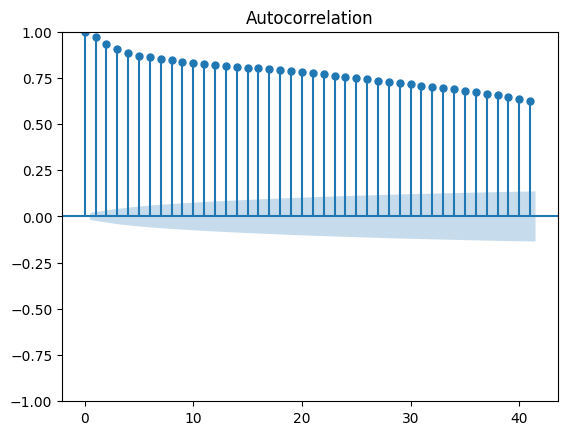

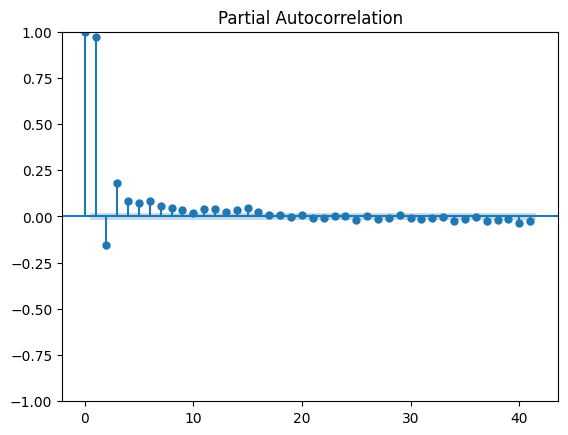

In [ ]:
residual = df.dropna()
plot_acf(residual['tg'])
plot_pacf(residual['tg'])
plt.show()

In [ ]:
kpss_diffs = ndiffs(df['tg'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df['tg'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 0


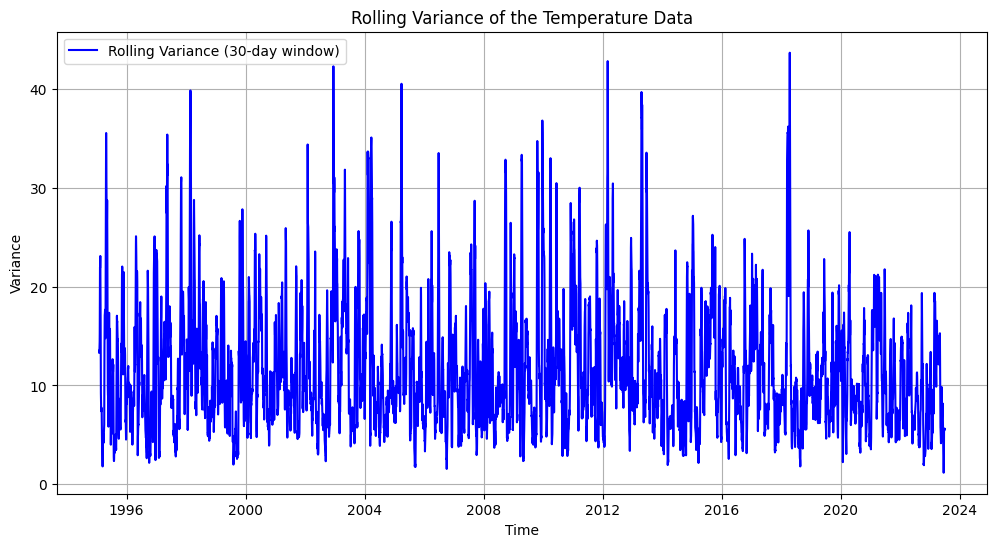

In [ ]:
# Plotting the rolling variance
rolling_var = df['tg'].rolling(window=30).var()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], rolling_var, color='blue', label='Rolling Variance (30-day window)')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Rolling Variance of the Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

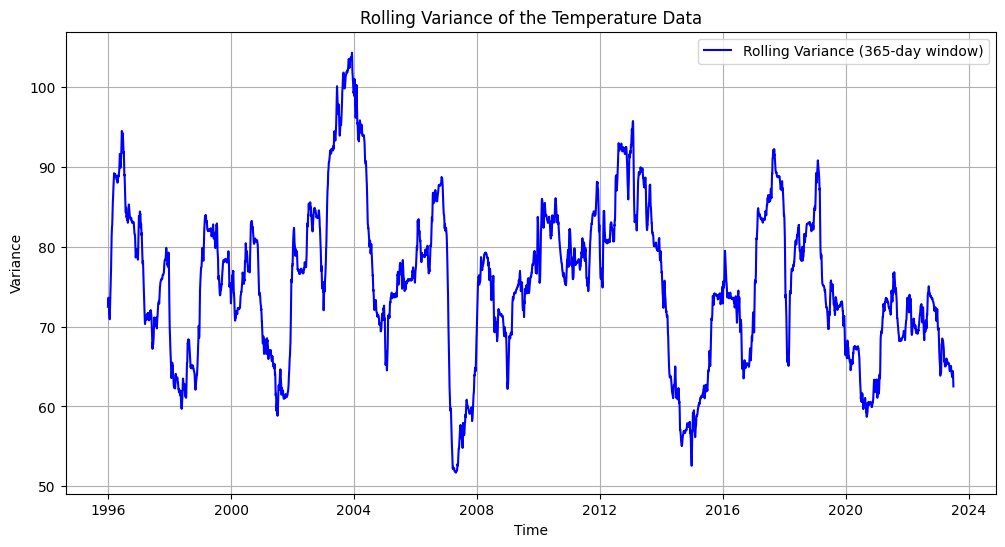

In [ ]:
# Plotting the rolling variance
rolling_var = df['tg'].rolling(window=365).var()

plt.figure(figsize=(12, 6))
plt.plot(df['time'], rolling_var, color='blue', label='Rolling Variance (365-day window)')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Rolling Variance of the Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))

    return mean_func

def var_over_time(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))

    return var_func

In [ ]:
mean = mean_over_time(df['tg'])
var = var_over_time(df['tg'])

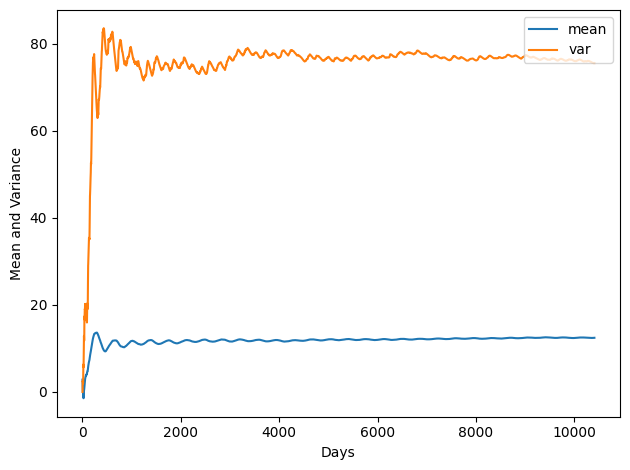

In [ ]:
fig, ax = plt.subplots()

ax.plot(mean, label='mean')
ax.plot(var, label='var')
ax.set_xlabel('Days')
ax.set_ylabel('Mean and Variance')
ax.legend(loc=1)

plt.tight_layout()

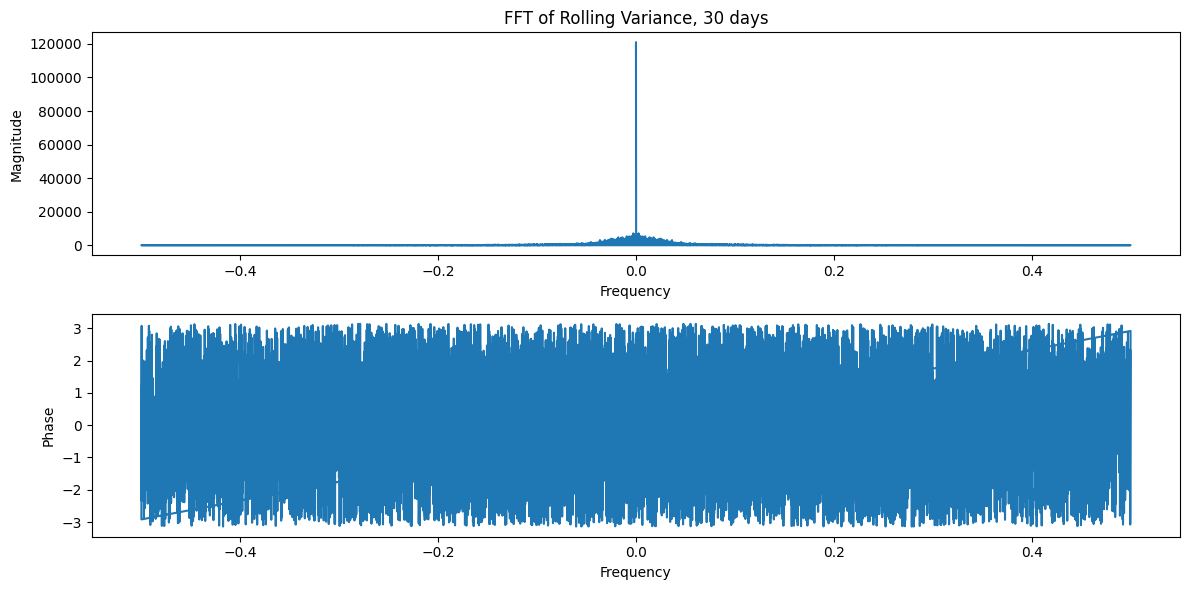

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def var_over_time(process: np.array, window_size: int) -> np.array:
    # Use a rolling window to calculate the variance over time
    rolling_var = pd.Series(process).rolling(window=window_size).var().dropna()
    return rolling_var

# Load the CSV file
df = pd.read_csv('data/Budapest_1995_2023.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Calculate rolling variance with a specified window size
window_size = 30
rolling_variance = var_over_time(df['tg'], window_size)

# Apply FFT on the rolling variance
fft_result = np.fft.fft(rolling_variance)
fft_freq = np.fft.fftfreq(len(rolling_variance))

# Plot the FFT result
plt.figure(figsize=(12, 6))

# Magnitude of FFT
plt.subplot(2, 1, 1)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('FFT of Rolling Variance, 30 days')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Phase of FFT
plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.angle(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Phase')

plt.tight_layout()
plt.show()


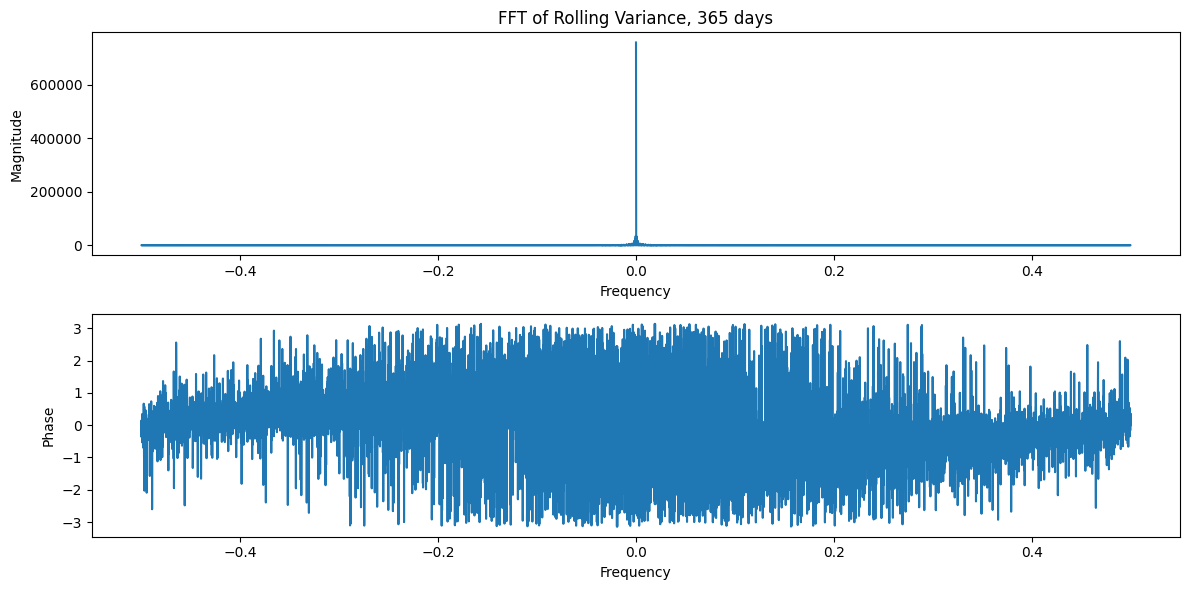

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def var_over_time(process: np.array, window_size: int) -> np.array:
    # Use a rolling window to calculate the variance over time
    rolling_var = pd.Series(process).rolling(window=window_size).var().dropna()
    return rolling_var

# Load the CSV file
df = pd.read_csv('data/Budapest_1995_2023.csv')

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Calculate rolling variance with a specified window size
window_size = 365
rolling_variance = var_over_time(df['tg'], window_size)

# Apply FFT on the rolling variance
fft_result = np.fft.fft(rolling_variance)
fft_freq = np.fft.fftfreq(len(rolling_variance))

# Plot the FFT result
plt.figure(figsize=(12, 6))

# Magnitude of FFT
plt.subplot(2, 1, 1)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('FFT of Rolling Variance, 365 days')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Phase of FFT
plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.angle(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Phase')

plt.tight_layout()
plt.show()


## Periodogram

### Additional info for FFT comparison in thesis

In [ ]:
# Support for comparing N2 and Nlog2N
N_large = np.linspace(1, 100000, 100000)

# Calculate N^2 and N log N
N_squared_large = N_large ** 2
N_logN_large = N_large * np.log2(N_large)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(N_large, N_squared_large, label=r'$N^2$', color='blue')
plt.plot(N_large, N_logN_large, label=r'$N \log_2 N$', color='red')

# Labels and title
plt.xlabel('Input Size (N)')
plt.ylabel('Operations')
plt.title('Comparison of $O(N^2)$ and $O(N \log_2 N)$ Time Complexities')
plt.yscale('log')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
def plot_periodogram(df, columns_to_plot, normalization_type='log'):
    """Plotting periodogram"""
    # Ensure df.index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a pd.DatetimeIndex.")

    periods = [1, 7, 30, 120, 365]
    labels = ['Daily', 'Weekly', 'Monthly', 'Seasonly', 'Yearly']

    fig, ax = plt.subplots(figsize=(20, 6))
    for col, color, label in columns_to_plot:
        fft_values = np.fft.rfft(df[col])[1:]
        periodogram = np.abs(fft_values)**2 / len(df)


        if normalization_type == 'max':
            periodogram = periodogram / np.max(periodogram)
        elif normalization_type == 'log':
            periodogram = np.log10(periodogram + 1)
        elif normalization_type == 'z-score':
            periodogram = (periodogram - np.mean(periodogram)) / np.std(periodogram)
        elif normalization_type == 'percentile':
            percentile = np.percentile(periodogram, 95)
            periodogram = np.minimum(periodogram, percentile)



        freqs = np.fft.rfftfreq(len(df), d=1)[1:]
        daily_freq = 1 / 1
        daily_freq_index = np.argmin(np.abs(freqs - daily_freq))
        print("Daily frequency index:", daily_freq_index, "Frequency:", freqs[daily_freq_index])





        periods_freqs = 1 / freqs
        ax.plot(periods_freqs, periodogram, color=color, label=label)

    # Adjusting plot scales and labels
    ax.set_xscale("log")
    ax.set_xticks(periods)
    ax.set_xticklabels(labels, rotation=45)



    ax.set_title("Periodogram Analysis")
    ax.set_xlabel("Period (Days)")
    ax.set_ylabel("Spectral Power")
    ax.legend()
    plt.grid(True)
    plt.show()

Daily frequency index: 5203 Frequency: 0.5


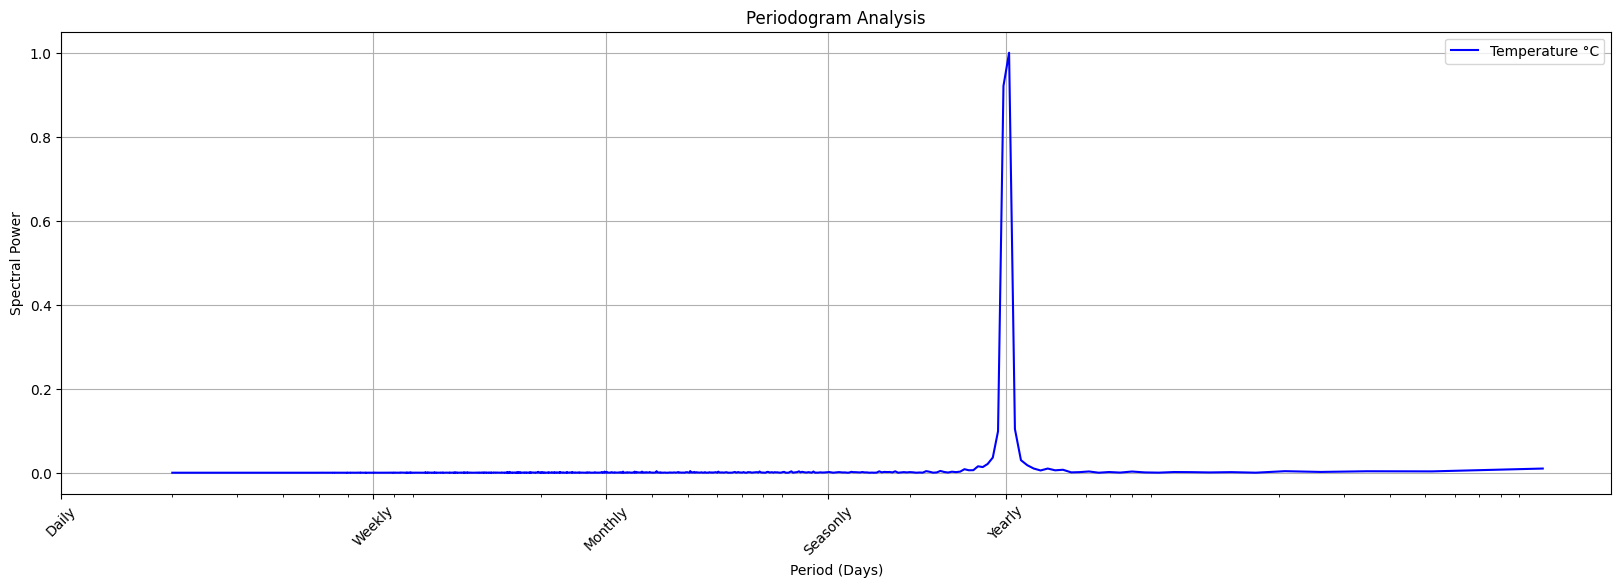

In [ ]:
df.set_index('time', inplace=True)
columns_to_plot = [('tg', 'blue', 'Temperature °C')]
plot_periodogram(df, columns_to_plot, normalization_type='max')

In [ ]:
var_df = pd.DataFrame({
    'time': df.index,
    'variance': var
})
var_df.head()

time  variance
0 1995-01-01       NaN
1 1995-01-02  0.000000
2 1995-01-03  0.067600
3 1995-01-04  0.710156
4 1995-01-05  1.882669

Top K Frequencies DataFrame:
   Frequency  Magnitude
0   0.000000  24.894453
1   0.002690   7.287224
2   0.002787   6.993356
3   0.002594   2.350625
4   0.002883   2.290371
5   0.002979   1.383676
6   0.002498   1.259153
7   0.003075   1.054648
8   0.002402   0.975499
9   0.003267   0.901366


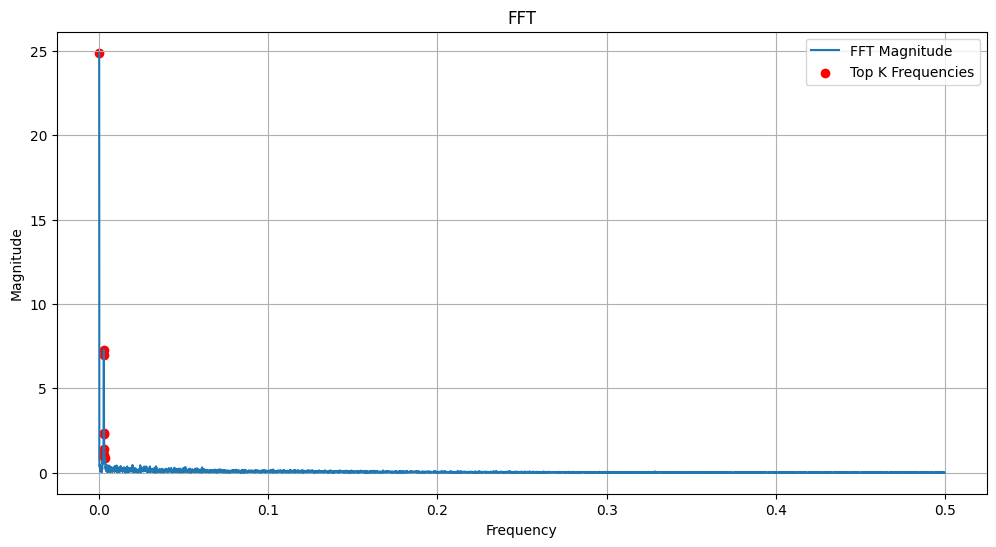

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


var_df = var_df.dropna()
# Perform FFT on the variance data using NumPy
variance = var_df['variance'].values
N = len(variance)
T = 1.0  # Assuming daily data (1 day intervals)

# fft_values = variance = var_df['variance'].values
fft_values = variance = df['tg'].values

# FFT computation
fft_result = fft(fft_values)
fft_freq = fftfreq(N, T)[:N//2]

# Compute the magnitude of the FFT result
fft_magnitude = 2.0/N * np.abs(fft_result[:N//2])

# Identify the top k frequencies
k = 10
top_k_indices = np.argsort(fft_magnitude)[-k:][::-1]
top_k_frequencies = fft_freq[top_k_indices]
top_k_magnitudes = fft_magnitude[top_k_indices]

# Create DataFrame for top k frequencies
top_k_df = pd.DataFrame({
    'Frequency': top_k_frequencies,
    'Magnitude': top_k_magnitudes
})

# Display the top k frequencies DataFrame
print("Top K Frequencies DataFrame:")
print(top_k_df)

# Plot the FFT result with highlighted top k frequencies
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, fft_magnitude, label='FFT Magnitude')
plt.scatter(top_k_frequencies, top_k_magnitudes, color='red', label='Top K Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.legend()
plt.grid(True)
plt.show()


## Seasonal and trend decomposition

Source:
* Cleveland, R. B., Cleveland, W. S., McRae, J. E., & Terpenning, I. J. (1990). STL: A seasonal-trend decomposition procedure based on loess. Journal of Official Statistics, 6(1), 3–33.
* https://otexts.com/fpp2/stl.html

In [ ]:
from statsmodels.tsa.seasonal import STL

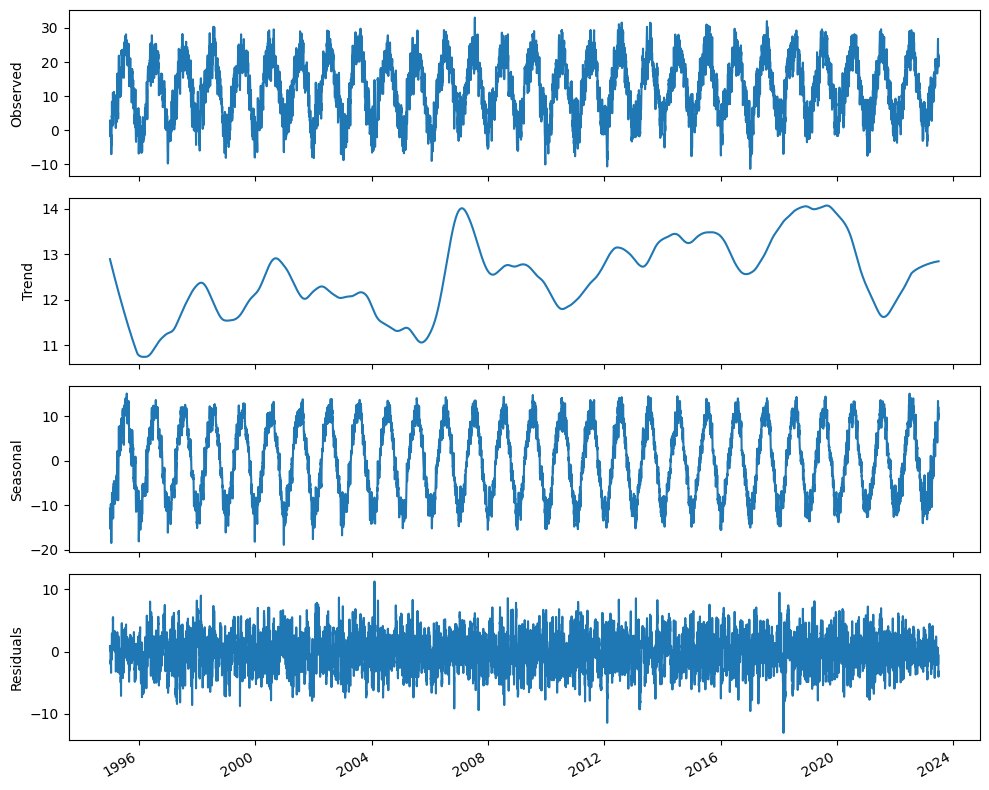

In [ ]:
decomposition = STL(df['tg'], period=365).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')


fig.autofmt_xdate()
plt.tight_layout()

# TimesNet

## Source

- April 2023
- https://arxiv.org/abs/2210.02186
- CNN-based model for
    - forecasting
    - data imputaion
    - anomaly detection
    - classification

Motivation
- multi-periodicity

Basically: reshapes the series in a 2D space to model:
- intrapeiod - variation: e.g. temperature in a day
- interperiod - variation: e.g. temperature day to day, or from year to year



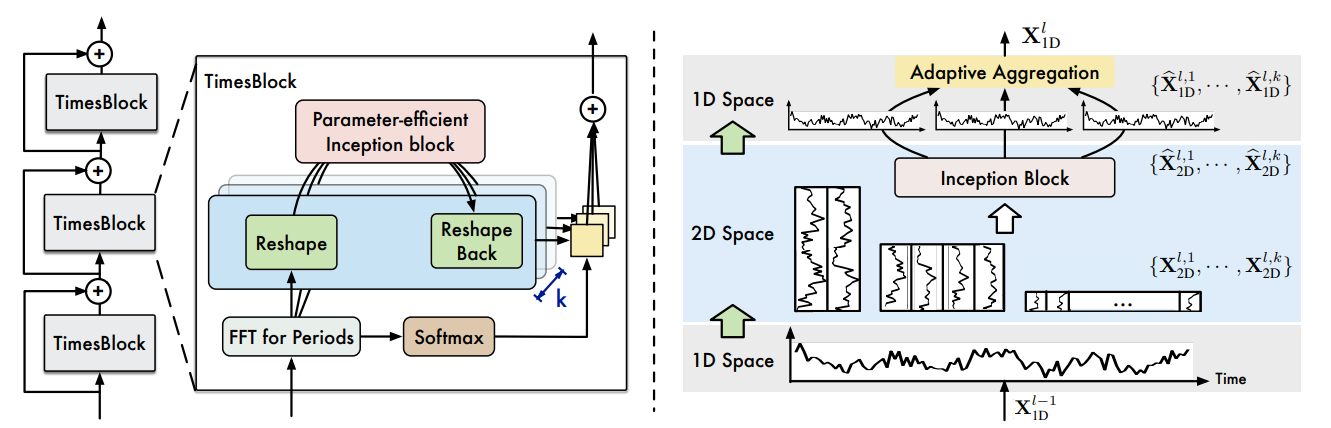

Residual connections of TimesBlocks.
Each residual block:
- Fast Fourier Transformation
- reshapes

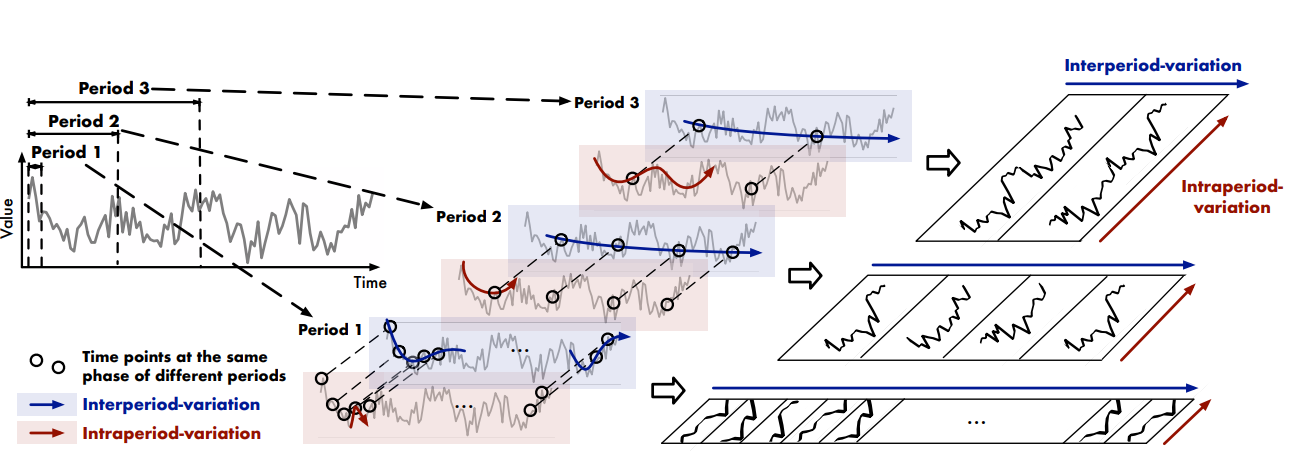

- Vertical axis: interperiod
- horizontal axis: intraperiod
Variations between adjacent points and adjacent periods

First we have to find periods --> FFT
For each period, creates a 2d tensor, goes to the inception block.
Inception block (GoogLeNet)


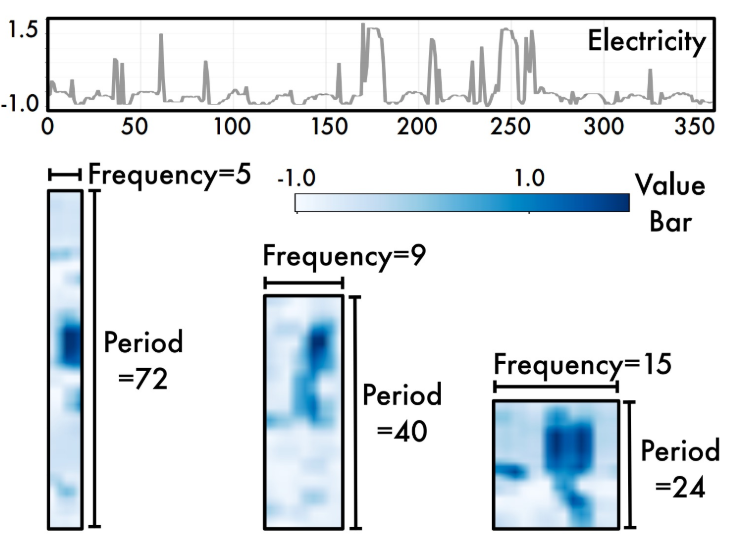

For each frequency (comes from FFT), reshapes the time series into a 2D tensor.
Inception block (imppementation?) Inception block is shared in all selected periods. It can be replaced by other block (ConvNext, ResNet, etc.)

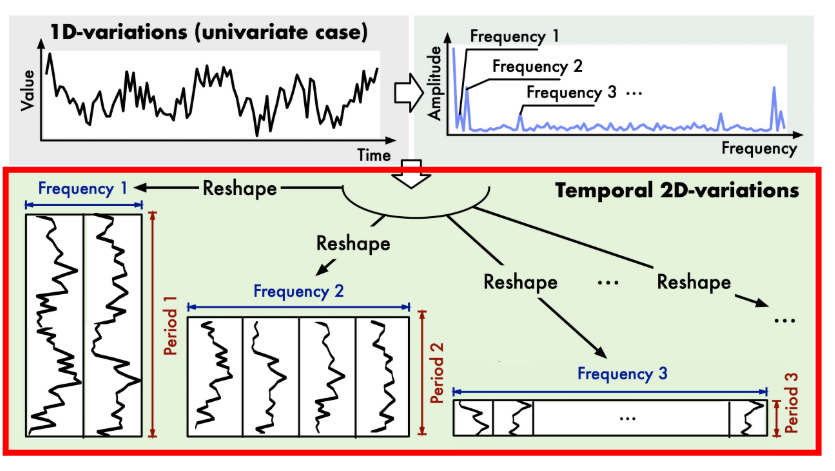

## Imports

TimesNet implementation through Neuralforecast framework. Sources: https://github.com/Nixtla/neuralforecast, https://nixtlaverse.nixtla.io/neuralforecast/models.timesnet.html

In [ ]:
!pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast import NeuralForecast
from neuralforecast.models import TimesNet
# comparing with different models
from neuralforecast.models import NHITS, NBEATS, FEDformer

from neuralforecast.losses.pytorch import MAE, MSE, SMAPE
from neuralforecast.losses.numpy import mae, mse, smape

# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

## Dataset

In [ ]:
df = pd.read_csv('data/Budapest_1995_2023.csv')
df['time'] = pd.to_datetime(df['time'])

df.head()

time    tg
0 1995-01-01  2.83
1 1995-01-02  2.31
2 1995-01-03  0.84
3 1995-01-04 -0.69
4 1995-01-05  0.18

In [ ]:
# Renaming is necessary because of neuralforecast
df['unique_id'] = 0
df = df.rename(columns={"time": "ds", "tg": "y"})

df = df[['unique_id', 'ds', 'y']]

df.head()

unique_id         ds     y
0          0 1995-01-01  2.83
1          0 1995-01-02  2.31
2          0 1995-01-03  0.84
3          0 1995-01-04 -0.69
4          0 1995-01-05  0.18

## Optuna

Source: https://optuna.readthedocs.io/en/stable/

In [ ]:
from neuralforecast.auto import AutoTimesNet

In [ ]:
import optuna
# optuna.logging.set_verbosity(optuna.logging.WARNING) # Use this to disable training prints from optuna

In [ ]:
# For default config use cases.
# default_config = AutoTimesNet.get_default_config(h = 30, backend="optuna")

# def config_timesnet(trial):
#     config = {**default_config(trial)}
#     config.update({
#                    "random_seed": trial.suggest_int("random_seed", 1, 10)
#                    })
#     return config

In [ ]:
# Custom config
def config_timesnet(trial):
    return {
        "input_size": horizon,
        "max_steps": 15,
        "random_seed": trial.suggest_int("random_seed", 1, 10),   # Different random seeds
        "top_k": trial.suggest_int("top_k", 1, 6)                 # Based on paper, for long-term forecasting top_k is the most important hyperparameter

    }

In [ ]:
# ~2 years
horizon = 730

In [ ]:
model = AutoTimesNet(h=700,
                  loss=MSE(),                                     # loss function selection according to the paper recommendation
                  config=config_timesnet,
                  search_alg=optuna.samplers.TPESampler(),
                  backend='optuna',
                  num_samples=30)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.


In [ ]:
nf = NeuralForecast(models=[model], freq='D')
nf.fit(df=df, val_size=700)

[I 2024-06-20 20:20:49,334] A new study created in memory with name: no-name-b260e3b1-3935-4053-aa4a-43b21e5f80de
INFO:lightning_fabric.utilities.seed:Seed set to 10
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MSE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:21:42,598] Trial 0 finished with value: 17.290225982666016 and parameters: {'random_seed': 10, 'top_k': 3}. Best is trial 0 with value: 17.290225982666016.
INFO:lightning_fabric.utilities.seed:Seed set to 5
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:24:37,920] Trial 1 finished with value: 14.948765754699707 and parameters: {'random_seed': 5, 'top_k': 5}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 7
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:25:25,290] Trial 2 finished with value: 21.464048385620117 and parameters: {'random_seed': 7, 'top_k': 3}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 5
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:28:43,013] Trial 3 finished with value: 20.436147689819336 and parameters: {'random_seed': 5, 'top_k': 6}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:30:44,512] Trial 4 finished with value: 18.63850212097168 and parameters: {'random_seed': 1, 'top_k': 5}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 5
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:31:01,712] Trial 5 finished with value: 30.621444702148438 and parameters: {'random_seed': 5, 'top_k': 1}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 3
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:33:05,111] Trial 6 finished with value: 17.768457412719727 and parameters: {'random_seed': 3, 'top_k': 5}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:34:38,652] Trial 7 finished with value: 15.65152359008789 and parameters: {'random_seed': 2, 'top_k': 3}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 4
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:34:54,860] Trial 8 finished with value: 16.12452507019043 and parameters: {'random_seed': 4, 'top_k': 1}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 4
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:35:11,014] Trial 9 finished with value: 16.124523162841797 and parameters: {'random_seed': 4, 'top_k': 1}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 8
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:38:00,281] Trial 10 finished with value: 19.313488006591797 and parameters: {'random_seed': 8, 'top_k': 5}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:39:01,014] Trial 11 finished with value: 21.155284881591797 and parameters: {'random_seed': 1, 'top_k': 4}. Best is trial 1 with value: 14.948765754699707.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:40:51,384] Trial 12 finished with value: 14.92251968383789 and parameters: {'random_seed': 2, 'top_k': 4}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 7
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:41:54,501] Trial 13 finished with value: 20.955528259277344 and parameters: {'random_seed': 7, 'top_k': 4}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 3
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:44:18,385] Trial 14 finished with value: 19.65612030029297 and parameters: {'random_seed': 3, 'top_k': 6}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 6
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:45:23,830] Trial 15 finished with value: 19.894142150878906 and parameters: {'random_seed': 6, 'top_k': 4}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 9
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:45:54,095] Trial 16 finished with value: 17.913400650024414 and parameters: {'random_seed': 9, 'top_k': 2}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 3
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:47:57,474] Trial 17 finished with value: 17.76980209350586 and parameters: {'random_seed': 3, 'top_k': 5}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:50:45,278] Trial 18 finished with value: 15.138761520385742 and parameters: {'random_seed': 2, 'top_k': 6}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 6
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:51:19,402] Trial 19 finished with value: 18.67534828186035 and parameters: {'random_seed': 6, 'top_k': 2}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 4
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:52:17,206] Trial 20 finished with value: 16.032541275024414 and parameters: {'random_seed': 4, 'top_k': 4}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:55:04,949] Trial 21 finished with value: 15.66948127746582 and parameters: {'random_seed': 2, 'top_k': 6}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:57:52,818] Trial 22 finished with value: 15.177106857299805 and parameters: {'random_seed': 2, 'top_k': 6}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 20:59:54,251] Trial 23 finished with value: 18.645605087280273 and parameters: {'random_seed': 1, 'top_k': 5}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 21:02:20,843] Trial 24 finished with value: 15.874134063720703 and parameters: {'random_seed': 2, 'top_k': 5}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 3
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 21:04:46,571] Trial 25 finished with value: 19.339679718017578 and parameters: {'random_seed': 3, 'top_k': 6}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 5
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 21:07:02,971] Trial 26 finished with value: 16.17803955078125 and parameters: {'random_seed': 5, 'top_k': 4}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 4
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 21:08:12,717] Trial 27 finished with value: 17.7500057220459 and parameters: {'random_seed': 4, 'top_k': 5}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 21:10:31,978] Trial 28 finished with value: 22.520702362060547 and parameters: {'random_seed': 1, 'top_k': 6}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 9
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | los

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 21:11:19,645] Trial 29 finished with value: 20.279359817504883 and parameters: {'random_seed': 9, 'top_k': 3}. Best is trial 12 with value: 14.92251968383789.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU availab

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.


From Optuna: The "value" column represents the objective value, which is the result of the objective function being optimized. The objective function is a user-defined function that takes a set of hyperparameters as input and returns a single numerical value that indicates the performance of those hyperparameters. In this case MSE.

In [ ]:
results = nf.models[0].results.trials_dataframe()
results.drop(columns='user_attrs_ALL_PARAMS')

number      value             datetime_start          datetime_complete  \
0        0  17.290226 2024-06-20 20:20:49.335918 2024-06-20 20:21:42.598046   
1        1  14.948766 2024-06-20 20:21:42.603217 2024-06-20 20:24:37.920230   
2        2  21.464048 2024-06-20 20:24:37.922793 2024-06-20 20:25:25.290162   
3        3  20.436148 2024-06-20 20:25:25.292547 2024-06-20 20:28:43.013207   
4        4  18.638502 2024-06-20 20:28:43.015583 2024-06-20 20:30:44.511464   
5        5  30.621445 2024-06-20 20:30:44.513210 2024-06-20 20:31:01.711811   
6        6  17.768457 2024-06-20 20:31:01.715478 2024-06-20 20:33:05.110042   
7        7  15.651524 2024-06-20 20:33:05.114979 2024-06-20 20:34:38.651914   
8        8  16.124525 2024-06-20 20:34:38.654777 2024-06-20 20:34:54.860006   
9        9  16.124523 2024-06-20 20:34:54.862475 2024-06-20 20:35:11.013856   
10      10  19.313488 2024-06-20 20:35:11.017124 2024-06-20 20:38:00.281401   
11      11  21.155285 2024-06-20 20:38:00.283841 2024-06-20 20:39:01.013841   
12      12  14.922520 2024-06-20 20:39:01.017252 2024-06-20 20:40:51.384312   
13      13  20.955528 2024-06-20 20:40:51.386039 2024-06-20 20:41:54.500736   
14      14  19.656120 2024-06-20 20:41:54.503392 2024-06-20 20:44:18.384882   
15      15  19.894142 2024-06-20 20:44:18.386754 2024-06-20 20:45:23.829533   
16      16  17.913401 2024-06-20 20:45:23.831367 2024-06-20 20:45:54.094261   
17      17  17.769802 2024-06-20 20:45:54.097212 2024-06-20 20:47:57.473541   
18      18  15.138762 2024-06-20 20:47:57.475263 2024-06-20 20:50:45.278234   
19      19  18.675348 2024-06-20 20:50:45.280098 2024-06-20 20:51:19.401450   
20      20  16.032541 2024-06-20 20:51:19.405808 2024-06-20 20:52:17.205283   
21      21  15.669481 2024-06-20 20:52:17.208855 2024-06-20 20:55:04.949022   
22      22  15.177107 2024-06-20 20:55:04.950956 2024-06-20 20:57:52.818177   
23      23  18.645605 2024-06-20 20:57:52.819959 2024-06-20 20:59:54.250912   
24      24  15.874134 2024-06-20 20:59:54.253308 2024-06-20 21:02:20.842602   
25      25  19.339680 2024-06-20 21:02:20.845850 2024-06-20 21:04:46.569931   
26      26  16.178040 2024-06-20 21:04:46.572840 2024-06-20 21:07:02.970384   
27      27  17.750006 2024-06-20 21:07:02.973590 2024-06-20 21:08:12.716213   
28      28  22.520702 2024-06-20 21:08:12.718726 2024-06-20 21:10:31.977635   
29      29  20.279360 2024-06-20 21:10:31.980373 2024-06-20 21:11:19.644346   

                 duration  params_random_seed  params_top_k  \
0  0 days 00:00:53.262128                  10             3   
1  0 days 00:02:55.317013                   5             5   
2  0 days 00:00:47.367369                   7             3   
3  0 days 00:03:17.720660                   5             6   
4  0 days 00:02:01.495881                   1             5   
5  0 days 00:00:17.198601                   5             1   
6  0 days 00:02:03.394564                   3             5   
7  0 days 00:01:33.536935                   2             3   
8  0 days 00:00:16.205229                   4             1   
9  0 days 00:00:16.151381                   4             1   
10 0 days 00:02:49.264277                   8             5   
11 0 days 00:01:00.730000                   1             4   
12 0 days 00:01:50.367060                   2             4   
13 0 days 00:01:03.114697                   7             4   
14 0 days 00:02:23.881490                   3             6   
15 0 days 00:01:05.442779                   6             4   
16 0 days 00:00:30.262894                   9             2   
17 0 days 00:02:03.376329                   3             5   
18 0 days 00:02:47.802971                   2             6   
19 0 days 00:00:34.121352                   6             2   
20 0 days 00:00:57.799475                   4             4   
21 0 days 00:02:47.740167                   2             6   
22 0 days 00:02:47.867221                   2             6   
23 0 days 00:02:01.430953                 

From the logs: "Best is trial 12 with value: 14.92251968383789" <br>
It can be seen that the loss value (optimizing goal) depends on the random seed at the same top_k parameter. It is suggested to investigate the effect of the random seed separately to top_k.

<Figure size 1200x800 with 0 Axes>

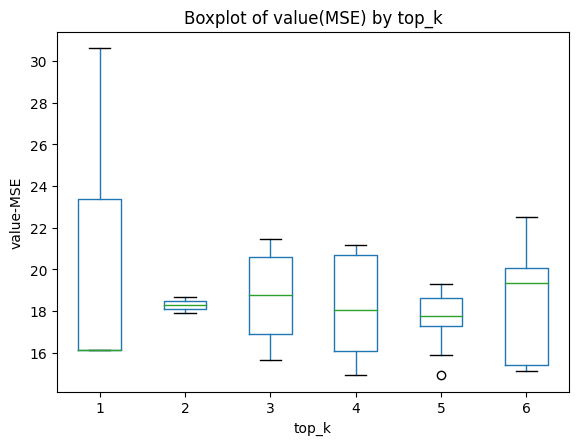

In [ ]:
# Creating boxplot for MSE values by k
plt.figure(figsize=(12, 8))
results.boxplot(column='value', by='params_top_k', grid=False)
plt.xlabel('top_k')
plt.ylabel('value-MSE')
plt.title('Boxplot of value(MSE) by top_k')
plt.suptitle('')

plt.show()

In [ ]:
# Try with one k, different random seeds with same model
# Custom config
def config_timesnet(trial):
    return {
        "input_size": horizon,
        "max_steps": 15,
        "random_seed": trial.suggest_int("random_seed", 1, 10),   # Different random seeds
        "top_k": 4                                                # Based on loss values, top_k=4
    }


search_space = {
    "random_seed": list(range(1, 11))
}

model = AutoTimesNet(h=700,
                  loss=MSE(),                                     # loss function selection according to the paper recommendation
                  config=config_timesnet,
                  search_alg=optuna.samplers.GridSampler(search_space), # Change the sampler to go through all random seeds
                  backend='optuna')
                  #num_samples=10)                                 # This is unnecessary due to using gridsampler

nf = NeuralForecast(models=[model], freq='D')
nf.fit(df=df, val_size=700)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
[I 2024-06-20 16:53:15,293] A new study created in memory with name: no-name-b696d631-2214-42ef-898b-6a19ee734a82
INFO:lightning_fabric.utilities.seed:Seed set to 7
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Nam

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 16:54:18,994] Trial 0 finished with value: 20.716249465942383 and parameters: {'random_seed': 7}. Best is trial 0 with value: 20.716249465942383.
INFO:lightning_fabric.utilities.seed:Seed set to 3
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 16:55:27,535] Trial 1 finished with value: 17.25591278076172 and parameters: {'random_seed': 3}. Best is trial 1 with value: 17.25591278076172.
INFO:lightning_fabric.utilities.seed:Seed set to 8
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 16:57:18,392] Trial 2 finished with value: 19.458175659179688 and parameters: {'random_seed': 8}. Best is trial 1 with value: 17.25591278076172.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 16:59:08,753] Trial 3 finished with value: 14.732247352600098 and parameters: {'random_seed': 2}. Best is trial 3 with value: 14.732247352600098.
INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 17:00:09,323] Trial 4 finished with value: 21.154176712036133 and parameters: {'random_seed': 1}. Best is trial 3 with value: 14.732247352600098.
INFO:lightning_fabric.utilities.seed:Seed set to 10
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 17:01:13,252] Trial 5 finished with value: 17.22722625732422 and parameters: {'random_seed': 10}. Best is trial 3 with value: 14.732247352600098.
INFO:lightning_fabric.utilities.seed:Seed set to 4
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 17:02:11,355] Trial 6 finished with value: 15.914743423461914 and parameters: {'random_seed': 4}. Best is trial 3 with value: 14.732247352600098.
INFO:lightning_fabric.utilities.seed:Seed set to 5
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 17:04:27,975] Trial 7 finished with value: 16.177764892578125 and parameters: {'random_seed': 5}. Best is trial 3 with value: 14.732247352600098.
INFO:lightning_fabric.utilities.seed:Seed set to 9
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 17:05:39,230] Trial 8 finished with value: 25.220577239990234 and parameters: {'random_seed': 9}. Best is trial 3 with value: 14.732247352600098.
INFO:lightning_fabric.utilities.seed:Seed set to 6
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, us

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
[I 2024-06-20 17:06:44,815] Trial 9 finished with value: 19.796682357788086 and parameters: {'random_seed': 6}. Best is trial 3 with value: 14.732247352600098.
INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.


In [ ]:
results = nf.models[0].results.trials_dataframe()
results.drop(columns='user_attrs_ALL_PARAMS')

number      value             datetime_start          datetime_complete  \
0       0  20.716249 2024-06-20 16:53:15.295354 2024-06-20 16:54:18.993146   
1       1  17.255913 2024-06-20 16:54:18.996196 2024-06-20 16:55:27.534382   
2       2  19.458176 2024-06-20 16:55:27.539836 2024-06-20 16:57:18.391100   
3       3  14.732247 2024-06-20 16:57:18.393515 2024-06-20 16:59:08.752754   
4       4  21.154177 2024-06-20 16:59:08.755142 2024-06-20 17:00:09.322894   
5       5  17.227226 2024-06-20 17:00:09.326023 2024-06-20 17:01:13.251131   
6       6  15.914743 2024-06-20 17:01:13.254297 2024-06-20 17:02:11.354992   
7       7  16.177765 2024-06-20 17:02:11.356973 2024-06-20 17:04:27.974198   
8       8  25.220577 2024-06-20 17:04:27.977233 2024-06-20 17:05:39.229077   
9       9  19.796682 2024-06-20 17:05:39.233004 2024-06-20 17:06:44.814665   

                duration  params_random_seed  \
0 0 days 00:01:03.697792                   7   
1 0 days 00:01:08.538186                   3   
2 0 days 00:01:50.851264                   8   
3 0 days 00:01:50.359239                   2   
4 0 days 00:01:00.567752                   1   
5 0 days 00:01:03.925108                  10   
6 0 days 00:00:58.100695                   4   
7 0 days 00:02:16.617225                   5   
8 0 days 00:01:11.251844                   9   
9 0 days 00:01:05.581661                   6   

                                  user_attrs_METRICS  system_attrs_grid_id  \
0  {'loss': tensor(20.7162), 'train_loss': tensor...                     0   
1  {'loss': tensor(17.2559), 'train_loss': tensor...                     1   
2  {'loss': tensor(19.4582), 'train_loss': tensor...                     2   
3  {'loss': tensor(14.7322), 'train_loss': tensor...                     3   
4  {'loss': tensor(21.1542), 'train_loss': tensor...                     4   
5  {'loss': tensor(17.2272), 'train_loss': tensor...                     5   
6  {'loss': tensor(15.9147), 'train_loss': tensor...                     6   
7  {'loss': tensor(16.1778), 'train_loss': tensor...                     7   
8  {'loss': tensor(25.2206), 'train_loss': tensor...                     8   
9  {'loss': tensor(19.7967), 'train_loss': tensor...                     9   

                          system_attrs_search_space     state  
0  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
1  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
2  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
3  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
4  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
5  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
6  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
7  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
8  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE  
9  {'random_seed': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}  COMPLETE

## Modeling

In [ ]:
horizon = 710

models = [TimesNet(
            h=horizon,
            input_size=horizon,
            max_steps=15,
            num_kernels = 6,
            top_k=4,
            random_seed=2)]

INFO:lightning_fabric.utilities.seed:Seed set to 2


In [ ]:
nf = NeuralForecast(models=models, freq='D')

In [ ]:
preds_df = nf.cross_validation(df=df, step_size=horizon, n_windows=3)

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MAE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 4.7 M  | train
4 | enc_embedding  | DataEmbedding | 192    | train
5 | layer_norm     | LayerNorm     | 128    | train
6 | predi

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=15` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
preds_df.head()

ds     cutoff   TimesNet      y
unique_id                                        
0         2017-08-31 2017-08-30  18.218479  23.57
0         2017-09-01 2017-08-30  16.871096  24.58
0         2017-09-02 2017-08-30  27.620081  18.08
0         2017-09-03 2017-08-30  23.038803  15.45
0         2017-09-04 2017-08-30  21.238312  16.58

## Evaluation

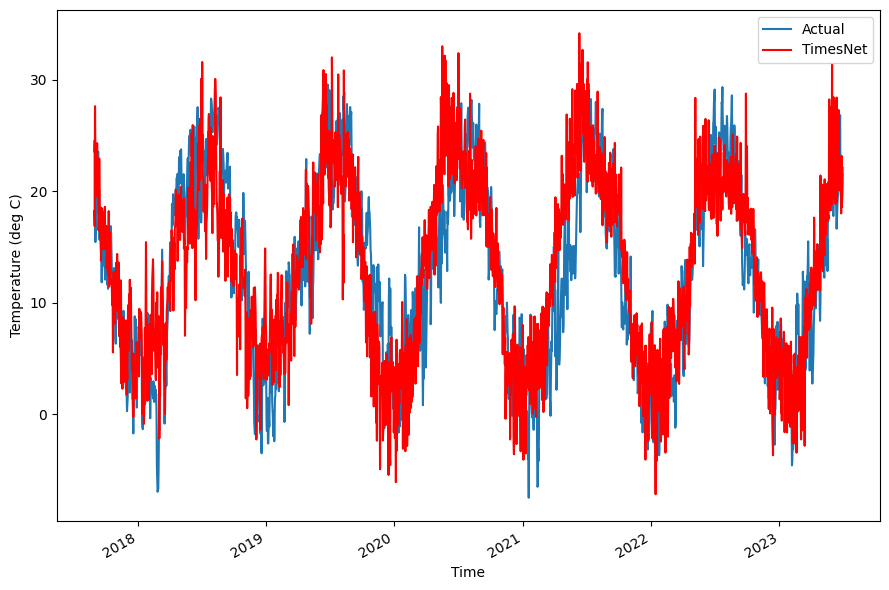

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(preds_df['ds'], preds_df['y'], label='Actual')
ax.plot(preds_df['ds'], preds_df['TimesNet'], label='TimesNet', ls='-', color='red')

ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
data = {'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

# If we are going to compare with other models
metrics_df.style.highlight_min(color='lightgreen', axis=1)

## Comparing with other models

In [ ]:
horizon = 365

models = [
    NHITS(h=horizon,
               input_size=horizon,
               max_steps=10),
    NBEATS(h=horizon,
               input_size=horizon,
               max_steps=10),
    FEDformer(h=horizon,
               input_size=horizon,
               max_steps=10),
    TimesNet(h=horizon,
                 input_size=horizon,
                 max_steps=10,
                num_kernels = 6,
                random_seed=2,
                top_k=4)]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 2


In [ ]:
nf = NeuralForecast(models=models, freq='D')

In [ ]:
preds_df = nf.cross_validation(df=df, step_size=horizon, n_windows=3)

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.6 M  | train
-------------------------------------------------------
3.6 M     Trainable params
0         Non-trainable params
3.6 M     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 4.6 M  | train
-------------------------------------------------------
4.1 M     Trainable params
533 K     Non-trainable params
4.6 M     Total params
18.337    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params | Mode 
--------------------------------------------------------
0 | loss          | MAE           | 0      | train
1 | padder_train  | ConstantPad1d | 0      | train
2 | scaler        | TemporalNorm  | 0      | train
3 | decomp        | SeriesDecomp  | 0      | train
4 | enc_embedding | DataEmbedding | 384    | train
5 | dec_embedding | DataEmbedding | 384    | train
6 | encoder       | Encoder       | 279 K  | train
7 | decoder       | Decoder       | 403 K  | train
--------------------------------------------------------
683 K     Trainable params
0         Non-trainable 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:303: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MAE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
preds_df.head()

ds     cutoff      NHITS     NBEATS  FEDformer   TimesNet  \
unique_id                                                                     
0         2020-07-01 2020-06-30  24.419964  26.192066  14.719295  20.009338   
0         2020-07-02 2020-06-30  25.519794  22.431047  15.420488  30.355612   
0         2020-07-03 2020-06-30  25.184437  24.928431  15.288879  22.772058   
0         2020-07-04 2020-06-30  24.753012  19.663994  14.902705  23.824705   
0         2020-07-05 2020-06-30  23.031715  19.407719  14.508374  18.439074   

                   y  
unique_id             
0          27.240000  
0          26.140000  
0          23.180000  
0          23.519999  
0          25.289999

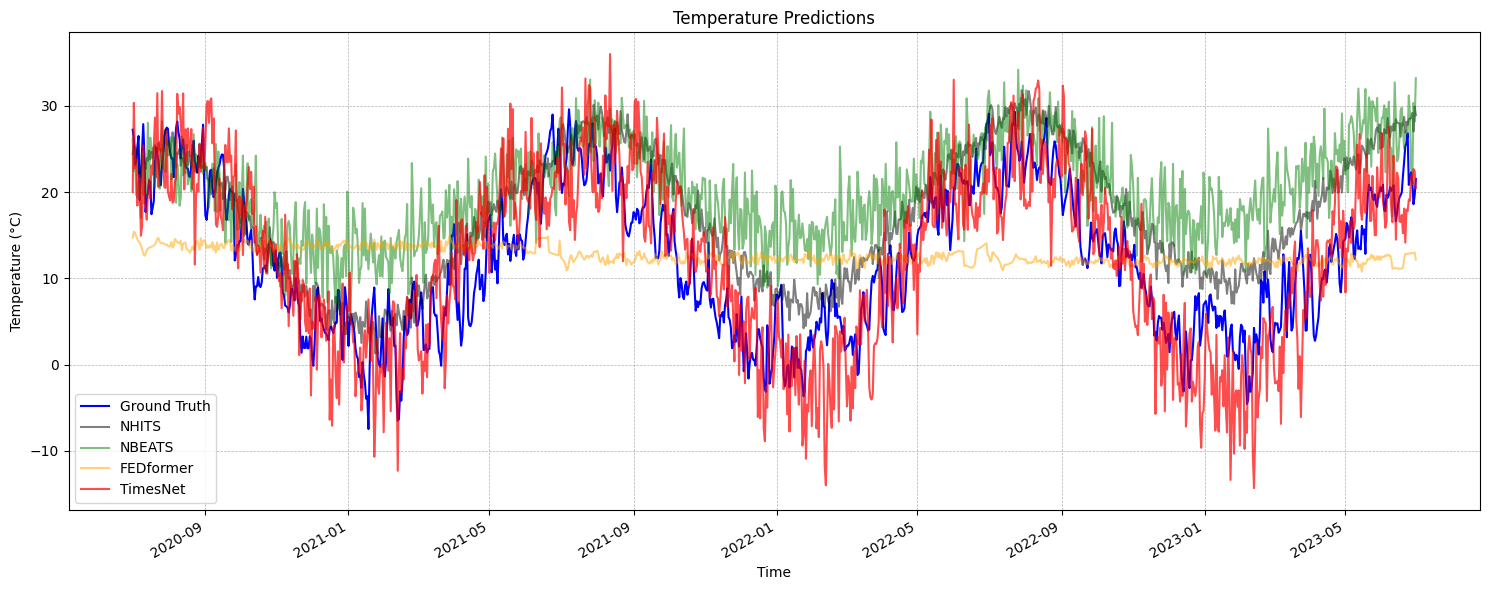

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting the data
ax.plot(preds_df['ds'], preds_df['y'], label='Ground Truth', linestyle='-', color='blue')
ax.plot(preds_df['ds'], preds_df['NHITS'], label='NHITS', linestyle='-', color='black', alpha=0.5)
ax.plot(preds_df['ds'], preds_df['NBEATS'], label='NBEATS', linestyle='-', color='green', alpha=0.5)
ax.plot(preds_df['ds'], preds_df['FEDformer'], label='FEDformer', linestyle='-', color='orange', alpha=0.5)
ax.plot(preds_df['ds'], preds_df['TimesNet'], label='TimesNet', linestyle='-', color='red', alpha=0.7)

# Adding legend
ax.legend(loc='best')

# Adding labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Predictions')

# Adding grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Formatting date labels
fig.autofmt_xdate()

plt.tight_layout()
plt.show()


In [ ]:
data = {'N-HiTS': [mae(preds_df['NHITS'], preds_df['y']), mse(preds_df['NHITS'], preds_df['y'])],
       'N-BEATS': [mae(preds_df['NBEATS'], preds_df['y']), mse(preds_df['NBEATS'], preds_df['y'])],
       'FEDformer': [mae(preds_df['FEDformer'], preds_df['y']), mse(preds_df['FEDformer'], preds_df['y'])],
       'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

## Change the horizon

In [ ]:
horizon = 30

models = [TimesNet(
            h=horizon,
            input_size=horizon,
            max_steps=30,
            num_kernels = 12,
            top_k=4,
            random_seed=2)]

INFO:lightning_fabric.utilities.seed:Seed set to 2


In [ ]:
nf = NeuralForecast(models=models, freq='D')

In [ ]:
preds_df = nf.cross_validation(df=df, step_size=1, n_windows=1)

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MAE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 37.7 M | train
4 | enc_embedding  | DataEmbedding | 192    | train
5 | layer_norm     | LayerNorm     | 128    | train
6 | predi

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


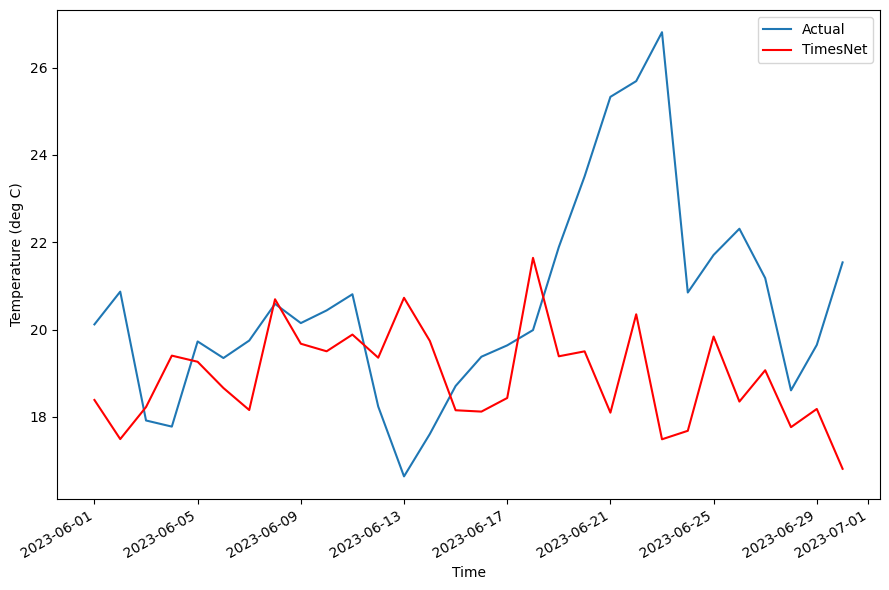

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(preds_df['ds'], preds_df['y'], label='Actual')
ax.plot(preds_df['ds'], preds_df['TimesNet'], label='TimesNet', ls='-', color='red')

ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
data = {'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

# If we are going to compare with other models
metrics_df.style.highlight_min(color='lightgreen', axis=1)

INFO:lightning_fabric.utilities.seed:Seed set to 2
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type          | Params | Mode 
---------------------------------------------------------
0 | loss           | MAE           | 0      | train
1 | padder_train   | ConstantPad1d | 0      | train
2 | scaler         | TemporalNorm  | 0      | train
3 | model          | ModuleList    | 37.7 M | train
4 | enc_embedding  | DataEmbedding | 192    | train
5 | layer_

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=30` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


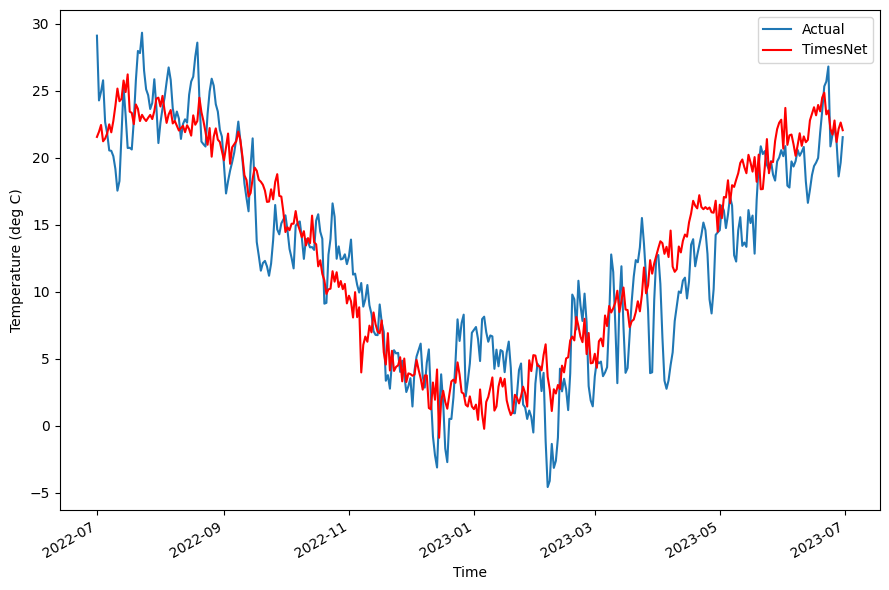

In [ ]:
horizon = 365

models = [TimesNet(
            h=horizon,
            input_size=horizon,
            max_steps=30,
            num_kernels = 12,
            top_k=4,
            random_seed=2)]

nf = NeuralForecast(models=models, freq='D')
preds_df = nf.cross_validation(df=df, step_size=1, n_windows=1)

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(preds_df['ds'], preds_df['y'], label='Actual')
ax.plot(preds_df['ds'], preds_df['TimesNet'], label='TimesNet', ls='-', color='red')

ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (deg C)')

fig.autofmt_xdate()
plt.tight_layout()

data = {'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

# If we are going to compare with other models
metrics_df.style.highlight_min(color='lightgreen', axis=1)

# Conclusion

The Notebook downloads gridded daily average temperature data for Europe, then picks one gridpoint (Budapest) for furher time series analysis. The goal is to implement TimesNEt model. After a brief descrription and data exploration the notebook tries to find optimal parameters (top_k) based on TimesNet article (source in TimesNet chapter). <br>
It can be seen that the recommended loss value depends on the seed value. The Notebook compares TimesNEt model (with optimized top_k) with other time series models (default parameters). <br>
<br>
TimesNet model uses pytorch's fft function (more details in Thesis), therefore daily average temperature data is not the best choice for investigating the model. The analysis can be developed by:
* using dataset where multiperiodicity is expected, e.g. hourly data for relative humidity, or energy consumption data
* comparing the model with other models, but optimized parameters at each model
* creating synthetic multiperiodic data for benchmarking purposes (This is also a to-be-developed area at the official paper in my opinion).
* using the model natively for investigating e.g. anomaly detection
* investigating the effect of visual backbone changes (currently Inception block was used) <br>
Refactoring the notebook (e.g. new functions/pipes for test) is also recommended.

Nagy Bálint, Budapest, 20-June-2024